# DS 5220 Problem Set 4: 
# Support Vector Machines (Spring 2021)
**Instructor:** Roi Yehoshua
<br>
**Student name:** Weiwei Liu (001404153)
<br>

## 1. SVM on a Toy Dataset

### (1) Can this data set (in its current feature space) be perfectly separated using a linear separator? 
In this dataset, 3 positive samples are distributed on two edges and 3 negative samples are in the middle. No matter drawing a seperator between -1 and -2, or between 1 and 3, there's always at least 1 misclassified sample. Therefore, there's no perfect linear separator existing to divide all samples into two classes with no error. 

### (2) Transforms points in $\mathbb{R}$ to points in $\mathbb{R}^2$:
**Positive points:**

$
x = \left\{−3, −2, 3\right\}\\
\phi(x) = (x, x^2) = \left\{(-3, 9), (2, 4), (3, 9)\right\}
$

**Negative points:**

$
x = \left\{−1, 0, 1\right\}\\
\phi(x) = (x, x^2) = \left\{(-1, 1), (0, 0), (1, 1)\right\}
$

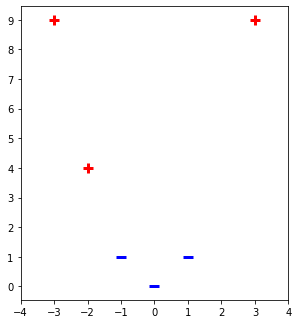

In [6]:
# Plot new feature space after trasforming

import matplotlib.pyplot as plt

pos_x = [-3, -2, 3]
pos_y = [9, 4, 9]
neg_x = [-1, 0, 1]
neg_y = [1, 0, 1]

plt.figure(figsize=(4.8, 5.4))
plt.plot(pos_x, pos_y, 'r+', mew=3, ms=10)
plt.plot(neg_x, neg_y, 'b_', mew=3, ms=10)
plt.yticks(list(range(10)))
plt.xlim(-4, 4);

### (3) Can a linear separator perfectly separate the points in the new $\mathbb{R}^2$ feature space? 
From the plot above, positive and negative points are clearly located at two sides. A clear gap between two classes represents an existance of a perfect linear separator seperating points in the new $\mathbb{R}^2$ feature space with no incorrect classification.  

### (4) Analytic form of the kernel:
$
\begin{align}
k(x, x') &= \phi(x)^T \phi(x')\\
&= \left(
    \begin{array}{c}
      x \\
      x^2
    \end{array}
  \right)^T \left(
    \begin{array}{c}
      x' \\
      x'^2
    \end{array}
  \right)\\
&= xx' + x^2 x'^2\\
&= xx'(1 + xx')
\end{align}
$

### (5) Construct a maximum-margin separating hyperplane: 
According to the concept of margin $\gamma$, two points respectively from two classes should be targetted first: (-1, 1) and (-2, 4). In order to maximize $\gamma$, the hyperplane must pass the center point of the line linking these two points, which is (-1.5, 2.5), and must be perpendicular with the line passing through these two points, e. g. the hyperplane is perpendicular with vector (-1, 3). 

Therefore, $z_2 = \frac{1}{3}z_1 + 3$, 

e. g. $z_1 - 3z_2 + 9 = 0$.

The margin is $\frac{\sqrt{(-2-(-1))^2 + (4-1)^2}}{2}=\frac{\sqrt{10}}{2}$

### (6) Plot the separating hyperplane and the margin: 

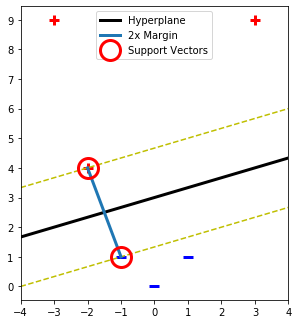

In [7]:
# Plot seperated hyperplane in new feature

import numpy as np

pos_x = [-3, -2, 3]
pos_y = [9, 4, 9]
neg_x = [-1, 0, 1]
neg_y = [1, 0, 1]

x_h = np.linspace(-4, 4, 100)
y_h = 1/3*x_h + 3
x_1 = np.linspace(-4, 4, 100)
y_1 = 1/3*x_1 + 14/3
x_2 = np.linspace(-4, 4, 100)
y_2 = 1/3*x_2 + 4/3
x_m = np.linspace(-2, -1, 100)
y_m = -3*x_m -2

plt.figure(figsize=(4.8, 5.4))
plt.plot(pos_x, pos_y, 'r+', mew=3, ms=10)
plt.plot(neg_x, neg_y, 'b_', mew=3, ms=10)
plt.plot(x_h, y_h, 'k-', lw=3, label='Hyperplane')
plt.plot(x_1, y_1, 'y--')
plt.plot(x_2, y_2, 'y--')
plt.plot(x_m, y_m, '-', lw=3, label='2x Margin')
plt.plot([-1, -2], [1, 4], 'ro', 
         mew=3, ms=20, mfc='None', 
         label='Support Vectors')

plt.yticks(list(range(10)))
plt.yticks(list(range(10)))
plt.xlim(-4, 4)
plt.legend(loc='best');

### (7) Draw the decision boundary of the separating hyperplane in the original feature space: 

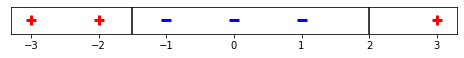

In [8]:
# Plot separating hyperplanes in the original feature space

pos_x = [-3, -2, 3]
neg_x = [-1, 0, 1]
axis_y = [0, 0, 0]

plt.figure(figsize=(8, 0.5))
plt.plot(pos_x, axis_y, 'r+', mew=3, ms=10)
plt.plot(neg_x, axis_y, 'b_', mew=3, ms=10)
plt.axvline(-1.5, color='black')
plt.axvline(2, color='black')
plt.yticks([]);

### (8) Compute the coefficients $\alpha$ and the constant $b$: 
According to SVM dual problem, 

the function we need to maximize is $L = \displaystyle\sum_{i=1}^{n} \alpha_i - \frac{1}{2} \displaystyle\sum_{i=1}^{n} \displaystyle\sum_{j=1}^{n} \alpha_i \alpha_j \mathbf{x}_i^T \mathbf{x}_j$. 

<br/>

Since $SV = \left\{\mathbf{u}_1 = (-2, 4), \mathbf{u}_2 = (-1, 1)\right\}$, $y_1 = 1, y_2 = -1$, 

$
\begin{align}
L &= \alpha_1 + \alpha_2 - \frac{1}{2} (\alpha_1^2(\mathbf{u}_1 \cdot \mathbf{u}_1) + \alpha_2^2(\mathbf{u}_2 \cdot \mathbf{u}_2) - 2\alpha_1\alpha_2(\mathbf{u}_1 \cdot \mathbf{u}_2))\\
&= \alpha_1 + \alpha_2 - \frac{1}{2} (20 \alpha_1^2 + 2 \alpha_2^2 - 12\alpha_1\alpha_2)
\end{align}
$

<br/>

According to the constraint $\alpha_i \geq 0, \displaystyle\sum_{i=1}^{n} \alpha_i y_i = 0$, 

we can get $\alpha_1 - \alpha_2 = 0$, e. g. $\alpha_1 = \alpha_2 = \alpha$. 

e. g. $L = \alpha + \alpha - \frac{1}{2} (20 \alpha^2 + 2 \alpha^2 - 12\alpha^2) = 2\alpha - 5\alpha^2$

<br/>

After taking the derivative of $L$ and set it to 0, 

we can get $\frac{\mathrm d}{\mathrm d \alpha} (2\alpha - 5\alpha^2) = 2 - 10\alpha = 0$, 

e. g. $\alpha_1 = \alpha_2 = \alpha = 0.2$

<br/>

Plug $\alpha$ and make Equation (1) for positive margin of 1, 

$\displaystyle\sum_{i=1}^{|SV|} \alpha_i y_i k(\mathbf{x}, \mathbf{u}_i) + b = 1$, 

e. g. $b = -1.8$

### (9) What if adding a new positive point at $x = 5$: 
The hyperplane will be same since the additional point is far away from the hyperplan and can be classified correctly. So no change will happen after adding this new point. 

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

## 2. Constructing Kernels

### (1) $k(x, x') = ck_1(x, x')$ for $c > 0$: 
Since $k_1(x, x')$ is a valid kernel, 

its kernel matrix $K_1$ is a positive semi-definite matrix, 

e. g. $\mathbf{u}^T K_1 \mathbf{u} \geq 0$. 

<br/>

If $\mathbf{u'} = \sqrt{c} \mathbf{u}$, $\mathbf{u'}^T = (\sqrt{c} \mathbf{u})^T = \sqrt{c} \mathbf{u}^T$, 

$
\begin{align}
\mathbf{u}^T c K_1 \mathbf{u} &= \sqrt{c} \mathbf{u}^T K_1 \sqrt{c} \mathbf{u}\\
&= \mathbf{u'}^T K_1 \mathbf{u'} \geq 0
\end{align}
$

e.g. $K = cK_1$ is a positive semi-definite matrix. 

<br/>

According to the symmetry propety of $k_1(x, x')$, 

$k_1(x, x') = k_1(x', x)$, $k(x, x') = ck_1(x, x') = ck_1(x', x) = k(x', x)$, 

e. g. $k(x, x') = ck_1(x, x')$ also has the symmetry property.

<br/>

Therefore, $k(x, x') = ck_1(x, x')$ for $c > 0$ is a valid kernel with $K = cK_1$ as its kernel matrix. 

### (2) $k(x, x') = k_1(x, x') + k_2(x, x')$: 
Since $k_1(x, x'), k_2(x, x')$ are valid kernels, 

their kernel matrix $K_1, K_2$ are positive semi-definite matrices with same size when inputting a same data set, 

e. g. $\mathbf{u}^T K_1 \mathbf{u} \geq 0, \mathbf{u}^T K_2 \mathbf{u} \geq 0$, and $K_1$ and $K_2$ can be added. 

<br/>

So, $\mathbf{u}^T (K_1 + K_2) \mathbf{u} = \mathbf{u}^T K_1 \mathbf{u} + \mathbf{u}^T K_2 \mathbf{u} \geq 0$, 

e. g. $K = K_1 + K_2$ is a positive semi-definite matrix. 

<br/>

According to the symmetry propety of $k_1(x, x'), k_2(x, x')$, 

$k(x, x') = k_1(x, x') + k_2(x, x') = k_1(x', x) + k_2(x', x) = k(x', x)$, 

e. g. $k(x, x') = k_1(x, x') + k_2(x, x')$ also has the symmetry property.

<br/>

Therefore, $k(x, x') = k_1(x, x') + k_2(x, x')$ is a valid kernel with $K = K_1 + K_2$ as its kernel matrix.

### (3) $k(x, x') = k_1(x, x')k_2(x, x')$:
Since $k_1(x, x'), k_2(x, x')$ are valid kernels, they both have the property of symmetry, 

e. g. $k_1(x, x') = k_1(x', x), k_2(x, x') = k_2(x', x)$, 

e. g. k(x, x') = k_1(x, x')k_2(x, x') = k_1(x', x)k_2(x', x) = k(x', x). 

So, $k(x, x') = k_1(x, x')k_2(x, x')$ also has the symmetry property. 

<br/>

From the symmetry property of $k(x, x')$, we can know that matrix $K_1 K_2$ is symmetric, 

e. g. $(K_1 K_2)^T K_1 K_2 = K_1 K_2 (K_1 K_2)^T$

e. g. $K_1 K_2$ is a normal matrix. 

According to *On a product of positive semidefinite matrices* written by A.R. Meenakshi and C. Rajian, $K = K_1 K_2$ is a positive semi-definite matrix based on the statement that $K_1, K_2$ are positive semidefinite matrices, and $K_1 K_2$ is a normal matrix. 

<br/>

Therefore, $k(x, x') = k_1(x, x')k_2(x, x')$ is a valid kernel with $K = K_1 K_2$ as its kernel matrix.

<br/>

**Reference:** On a product of positive semidefinite matrices, A.R. Meenakshi, C. Rajian, 

Linear Algebra and its Applications, Volume 295, Issues 1–3, 1 July 1999, Pages 3–6.

### (4) $k(x, x') = f(x)k_1(x, x')f(x')$, where $f$ is any function from $\mathbb{R}^m$ to $\mathbb{R}$: 
Since f(x) is a function from $\mathbb{R}^m$ to $\mathbb{R}$, it can be a transformation function $\phi(x)$, 

$
\begin{align}
k(x, x') &= f(x)k_1(x, x')f(x')\\ 
&= \phi(x) k_1(x, x') \phi(x')
\end{align}
$

<br/>

Because $\mathbf{u} = \mathbf{u}^T$ if $\mathbf{u} \in \mathbb{R}$,

$
\begin{align}
\phi(x) k_1(x, x') \phi(x') &= \phi(x)^T k_1(x, x') \phi(x')\\
&= (\phi(x)^T \phi(x')) k_1(x, x')
\end{align}
$

<br/>

A valid kernel $k_2(x, x')$ can be found for $\phi(x)^T \phi(x')$, 

then, $k(x, x') = f(x)k_1(x, x')f(x') = k_2(x, x') k_1(x, x')$. 

<br/>

Therefore, according to what we have proven in (3), $k(x, x') = f(x)k_1(x, x')f(x')$ is a valid kernel where $f$ is any function from $\mathbb{R}^m$ to $\mathbb{R}$. 

### (5) Proof of writting $exp(xx') (x, x' \in R)$ with $\phi(x)^T \phi(x')$: 
$
\begin{align}
exp(xx') &= \displaystyle\sum_{i=0}^{\infty} \frac{(xx')^i}{i!}\\
&= \displaystyle\sum_{i=0}^{\infty} \frac{x^i x'^i}{i!}\\
&= \frac{1}{0!} x^0 x'^0 + \frac{1}{1!} x^1 x'^1 + \frac{1}{2!} x^2 x'^2 + \frac{1}{3!} x^3 x'^3 + \cdots
\end{align}
$

In the above summation as $i$ goes from $0$ to infinity, all infinite parts contains the product of $x^i$ and $x'^i$, which can be seen as the inner product of two n-dimension vectors transformed by $\phi(x)$, e. g. $\phi(x)^T \phi(x')$. 

### (6) Prove the validity of the Gaussian kernel: 
$
\begin{align}
k(x, x') &= exp(\frac{-||\mathbf{x}-\mathbf{x}'||^2}{2\sigma^2})\\
&= exp(-\frac{\mathbf{x}^T\mathbf{x}}{2\sigma^2}) exp(-\frac{\mathbf{x}'^T\mathbf{x}'}{2\sigma^2}) exp(\frac{\mathbf{x}^T\mathbf{x}'}{\sigma^2})\\
\end{align}
$

<br/>

From (5), we have known that $exp(xx') (x, x' \in R)$ can be written with $\phi(x)^T \phi(x')$, e. g. there's a valid kernel for it. Therefore, a valid kernel $k_1(\mathbf{x}, \mathbf{x}')$ exist for $exp(\frac{\mathbf{x}^T\mathbf{x}'}{\sigma^2})$, which is the third part in the above. 

<br/>

Since the first parts in the above $exp(-\frac{\mathbf{x}^T\mathbf{x}}{2\sigma^2})$ and $exp(-\frac{\mathbf{x}'^T\mathbf{x}'}{2\sigma^2})$ can be regarded as a function $f(\mathbf{x})$ transforming $\mathbf{x}$ and $\mathbf{x}'$ respectively from $\mathbb{R}^m$ to $\mathbb{R}$, the above equality can be written into $k(x, x') = exp(\frac{-||\mathbf{x}-\mathbf{x}'||^2}{2\sigma^2}) = f(\mathbf{x})k_1(\mathbf{x}, \mathbf{x}')f(\mathbf{x}')$ which has been proven as a valid kernel in (3). 

<br/>

Therefore, Gaussian kernel is a valid kernel. 